<a href="https://www.scinbre.org/learning/bioinformatics-workshops/2024-summer-workshops"><img src="https://i.ibb.co/N6W5kPM/inbre-header.png" alt="inbre-header" border="0"></a>


### Machine Learning in Python
### June 12th, 2024

# First hour: Classification with decision trees

**Decision trees** and **random forests** are another type of machine learning algorithm, like KNN and k-means. These are a few examples of how decision trees and random forests have been used in life science:
 * Identifying if a gene is pathogenic or not pathogenic [(do Nascimento et al., 2020)](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7063785/)
 * Deciding between surgically treating a brain tumor or conducting surveillance using MRI [(Gadot et al., 2022)](https://thejns.org/focus/view/journals/neurosurg-focus/52/4/article-pE8.xml?tab_body=fulltext)
 * Predicting the outcome of brain stroke [(Fernandez-Lozano et al., 2021)](https://www.nature.com/articles/s41598-021-89434-7)

## How decision trees work

A decision tree algorithm 'makes decisions' much like we would:

*  It considers the factors influencing the decision.
*  It prioritizes the factors.
*  It goes through different choices based on these factors.

Let us say we would like to predict the risk for heart disease (see the diagram below):
 *  The training dataset contains information on the known factors influencing the decision: age, weight, and smoking status.
 *  The decision tree considers these known factors.
 *  It prioritizes the factors and decides which factor takes the position of the **root node**, and which ones take the position of decision nodes. The **leaf nodes** represent choices based on these.
 *  There is some math involved in the prioritizing process - the algorithm calculates an **impurity index** using either the **Gini Coefficient** or **entropy**. [Here](https://www.youtube.com/watch?v=-W0DnxQK1Eo&ab_channel=UnfoldDataScience) is a 11-minute video on this topic.
 * [Here](https://www.youtube.com/watch?v=ZVR2Way4nwQ&ab_channel=NormalizedNerd) is a 10-minute video explaining decision trees.

 (Image courtesy Ali Abid Awan, Datacamp)

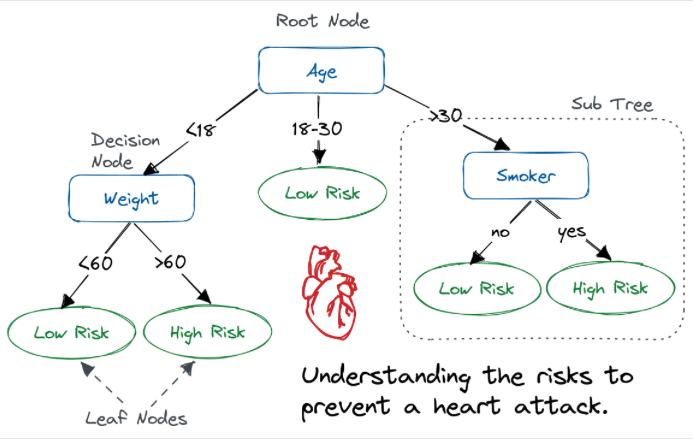


**Context:**


*  We will use a publicly available breast cancer dataset.
*  The dataset has information on 569 participants diagnosed with a malignant or a benign breast tumor.
*  The diagnosis is the **'target'** data that we will train our model with.
*  There were originally 30 columns, each corresponding to a characteristic or **'feature'** of the tumor.
*  For this workshop, we have chosen a subset of 5 features. These will be the 'features' we will train our model with.
*  We will train a decision tree algorithm to classify a tumor as benign or malignant, given information on five features that influence tumor malignancy

1. Load the dataset and view the first 5 rows

In [ ]:
import pandas as pd

url_root = "https://raw.githubusercontent.com/lina-usc/scinbre-python-2024/main/0612_decision_tree_random_forest/"
cancer_df = pd.read_csv(url_root + 'cancer_df_1.csv')

In [ ]:
cancer_df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean
0,842302,M,17.99,10.38,122.80,1001.0,0.11840
1,842517,M,20.57,17.77,132.90,1326.0,0.08474
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960
3,84348301,M,11.42,20.38,77.58,386.1,0.14250
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030


2. Remove unwanted columns

In [ ]:
cancer_df.drop(columns=['id'],inplace=True)
cancer_df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean
0,M,17.99,10.38,122.80,1001.0,0.11840
1,M,20.57,17.77,132.90,1326.0,0.08474
2,M,19.69,21.25,130.00,1203.0,0.10960
3,M,11.42,20.38,77.58,386.1,0.14250
4,M,20.29,14.34,135.10,1297.0,0.10030
...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100
565,M,20.13,28.25,131.20,1261.0,0.09780
566,M,16.60,28.08,108.30,858.1,0.08455
567,M,20.60,29.33,140.10,1265.0,0.11780


3. Remove outliers

In [ ]:
columns = []
for column in cancer_df.columns:
    if cancer_df[column].dtype=='float64':
        columns.append(column)

# Note that these four lines could be replaced by list comprehension
columns = [column
           for column in cancer_df.columns
           if cancer_df[column].dtype=='float64']

cancer_df[columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   radius_mean      569 non-null    float64
 1   texture_mean     569 non-null    float64
 2   perimeter_mean   569 non-null    float64
 3   area_mean        569 non-null    float64
 4   smoothness_mean  569 non-null    float64
dtypes: float64(5)
memory usage: 22.4 KB


In [ ]:
for column in columns:
    Q1 = cancer_df[column].quantile(0.25)
    Q3 = cancer_df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    cancer_df[column] = cancer_df[(cancer_df[column] >= lower_bound) & (cancer_df[column] <= upper_bound)][column]

cancer_df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean
0,M,17.99,10.38,122.80,1001.0,0.11840
1,M,20.57,17.77,132.90,1326.0,0.08474
2,M,19.69,21.25,130.00,1203.0,0.10960
3,M,11.42,20.38,77.58,386.1,NaN
4,M,20.29,14.34,135.10,1297.0,0.10030
...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,NaN,0.11100
565,M,20.13,28.25,131.20,1261.0,0.09780
566,M,16.60,28.08,108.30,858.1,0.08455
567,M,20.60,29.33,140.10,1265.0,0.11780


4. Address missing values:

* Missing values are indicated by 'NaN'.
* You may choose to drop rows with 'NaN' values if there are not too many.
* If dropping rows with 'NaN' values will lead to a significant loss of data, you may instead choose to replace the values (i.e, data imputation).

Here, we will drop the rows with NaN values.

In [ ]:
cancer_df.dropna(inplace=True)
cancer_df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean
0,M,17.99,10.38,122.80,1001.0,0.11840
1,M,20.57,17.77,132.90,1326.0,0.08474
2,M,19.69,21.25,130.00,1203.0,0.10960
4,M,20.29,14.34,135.10,1297.0,0.10030
5,M,12.45,15.70,82.57,477.1,0.12780
...,...,...,...,...,...,...
560,B,14.05,27.15,91.38,600.4,0.09929
561,B,11.20,29.37,70.67,386.0,0.07449
565,M,20.13,28.25,131.20,1261.0,0.09780
566,M,16.60,28.08,108.30,858.1,0.08455


5. Separate the feature variables and the target variable

In [ ]:
y = cancer_df.diagnosis
x = cancer_df.drop('diagnosis',axis=1)

In [ ]:
y

0      M
1      M
2      M
4      M
5      M
      ..
560    B
561    B
565    M
566    M
567    M
Name: diagnosis, Length: 533, dtype: object

In [ ]:
x

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean
0,17.99,10.38,122.80,1001.0,0.11840
1,20.57,17.77,132.90,1326.0,0.08474
2,19.69,21.25,130.00,1203.0,0.10960
4,20.29,14.34,135.10,1297.0,0.10030
5,12.45,15.70,82.57,477.1,0.12780
...,...,...,...,...,...
560,14.05,27.15,91.38,600.4,0.09929
561,11.20,29.37,70.67,386.0,0.07449
565,20.13,28.25,131.20,1261.0,0.09780
566,16.60,28.08,108.30,858.1,0.08455


6. Convert the target values from 'M' and 'B' to binary '0' and '1'

In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y = encoder.fit_transform(y)
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,

7. Normalize the feature variables

In [ ]:
x.describe().drop("count")

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean
mean,13.730799,19.019287,89.193977,609.222702,0.095665
std,2.973869,4.021576,20.431235,272.775835,0.013223
min,6.981000,9.710000,43.790000,143.500000,0.062510
25%,11.660000,16.070000,74.720000,416.200000,0.085830
50%,13.170000,18.680000,85.260000,537.300000,0.095160
75%,15.280000,21.540000,100.300000,716.600000,0.104500
max,21.090000,29.970000,143.700000,1326.000000,0.133500


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
normed_x = scaler.fit_transform(x)
normed_x

array([[0.78028209, 0.03307009, 0.79081173, 0.72515856, 0.78729399],
       [0.96314409, 0.39782823, 0.89190271, 1.        , 0.3131427 ],
       [0.90077256, 0.56959526, 0.86287659, 0.89598309, 0.66333286],
       ...,
       [0.93195832, 0.91510365, 0.8748874 , 0.94503171, 0.49711227],
       [0.68176341, 0.90671273, 0.64568111, 0.6043129 , 0.31046626],
       [0.96527039, 0.96841066, 0.96396757, 0.94841438, 0.77884209]])

In [ ]:
pd.DataFrame(normed_x, columns=x.columns).describe().drop("count")

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean
mean,0.478404,0.459491,0.454449,0.393846,0.467044
std,0.210778,0.198498,0.204496,0.230677,0.186262
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.331632,0.313919,0.309579,0.230613,0.328497
50%,0.438656,0.442744,0.415074,0.333023,0.459924
75%,0.588206,0.583909,0.565609,0.484651,0.591492
max,1.000000,1.000000,1.000000,1.000000,1.000000


8. Split into training and test datasets

Here, `test_size = 0.20` means that we split the dataset into portions of 20% (test dataset) and 80% (training dataset).

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

9. Build the decision tree model using the training dataset.

*   `max_depth=4` is a way of limiting the number of decision nodes that the algorithm produces. Too many decision nodes lead to the risk of 'overfitting' (i.e., the model performs well only on the data it has been trained with; it does not generalize to new datasets)
*   `criterion='gini'` instructs the algorithm to calculate impurity using the Gini coefficient. The criterion may be changed to `'entropy'` or `'log_loss'`

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='gini', max_depth=3)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

10. Use standard metrics to evaluate the performance of the decision tree on the test dataset.

*  **Accuracy** = correct predictions / number of predictions
*  **Precision** = True positive / (True positive + False positive)
*  **Recall** = True positive / (True positive + False negative)
*  **F1-score** = Harmonic mean of precision score and recall

In [ ]:
from sklearn import metrics

expected = y_test
predicted = model.predict(X_test)

performances = pd.DataFrame({
  'accuracy': [metrics.accuracy_score(expected, predicted)],
  'precision': [metrics.precision_score(expected, predicted)],
  'recall': [metrics.recall_score(expected, predicted)],
  'f1_score': [metrics.f1_score(expected, predicted)]
}, index=["Decision tree"])

print(performances.round(3))

               accuracy  precision  recall  f1_score
Decision tree     0.925      0.897   0.897     0.897


11. Visualize the decision tree.

We will not go into detail about interpreting the tree. There is a tutorial listed in the 'Resources' section below which offers instructions on how to interpret a decision tree.

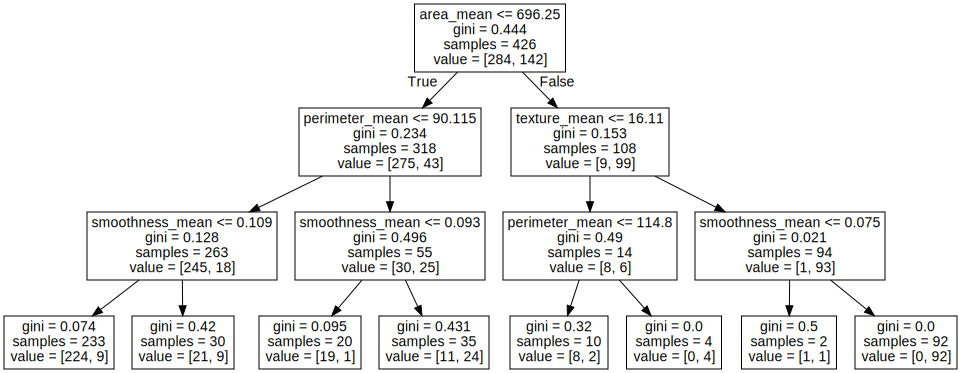

In [ ]:
import graphviz
from sklearn.tree import export_graphviz

features=cancer_df.drop('diagnosis',axis=1).columns
export_graphviz(model,
                out_file = "model.dot",
                feature_names = features)

with open("model.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

## Exercises: Decision Trees

1.   Load the dataset `"cancer_df_2.csv"`. This dataset can also be found at the same place as `"cancer_df_1.csv"`, using the `url_root` variable as done previously. View the top 5 rows.



2.   Remove the `id`, as it is not useful for this work.

3.   Remove outliers.

4. Address missing values (NaN).

*   Try '.dropna' and '.fillna'. Is it a good way to address missing data in this case?

5. Separate the dataset into feature (X) and target (y) variables. The target variable here will be the diagnosis.

6. Convert the target values from 'M' and 'B' to binary '0' and '1'

7. Normalize the feature variables.


8. Split into training and test datasets.

9.   Build a decision tree.

10.   Evaluate your model (i.e., accuracy, precision, recall, f1).

# Second hour: Classification with Random forests



## How random forests work

Random forests consist of multiple decision trees. They make a decision based on an aggregate of the multiple decision trees. [Here](https://www.youtube.com/watch?v=v6VJ2RO66Ag&ab_channel=NormalizedNerd) is a 8-minute video explaining in more details the ideas behind random forests.

## When to use decision trees or random forests
* Decision trees are more prone to overfitting than random forests.
* Decision trees are also easier to interpret
* Random forests require more time to train and are more complex.

Papers often compare different algorithms for a given application and benchmark their performance. Some examples are listed in the resources section at the end of this notebook.

1. We build a random forest model using the same training and test dataset as previously.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 100)
model.fit(X_train, y_train)

RandomForestClassifier()

2. We generate evaluation metrics for the model.

In [ ]:
expected = y_test
predicted = model.predict(X_test)

performances.loc["Random forest"] = pd.Series({
  'accuracy': metrics.accuracy_score(expected, predicted),
  'precision': metrics.precision_score(expected, predicted),
  'recall': metrics.recall_score(expected, predicted),
  'f1_score': metrics.f1_score(expected, predicted)
})

print(performances.round(3))

               accuracy  precision  recall  f1_score
Decision tree     0.925      0.897   0.897     0.897
Random forest     0.944      0.946   0.897     0.921


The random forest model seems to perform better than the decision tree model in this case.

3.  After developing a model, it is often important to evaluate which features contribute the most to the prediction. Here, we rank the features in order of importance for the classification.

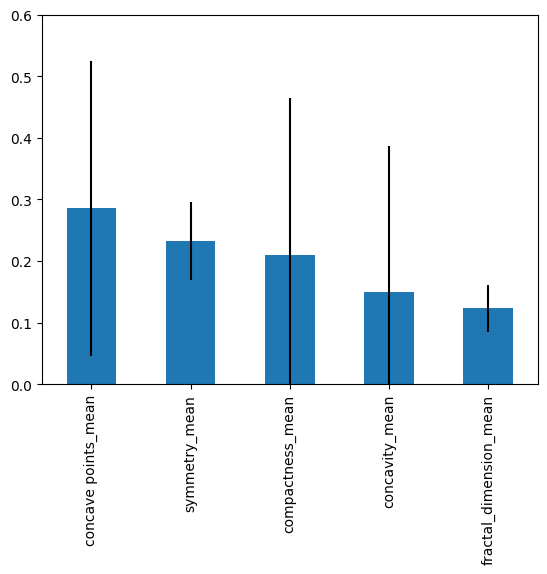

In [ ]:
import numpy as np
import pandas as pd
feature_names = cancer_df.drop('diagnosis',axis=1).columns
feature_imp = pd.Series(model.feature_importances_, index = feature_names).sort_values(ascending = False)

std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)

ax = feature_imp.plot.bar(yerr=std)
ax.set_ylim(0, 0.6);

You can learn more about evaluating feature importance on decision trees and random forests [here](https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html) and [here](https://scikit-learn.org/stable/auto_examples/inspection/plot_permutation_importance.html#sphx-glr-auto-examples-inspection-plot-permutation-importance-py).

## Other classifiers

Many other classifier exists, with very different properties. Here is a figure showing the main scikit-learn classifiers and their decision boundaries. The code used to generate these figures can be found [here](https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html#sphx-glr-auto-examples-classification-plot-classifier-comparison-py).

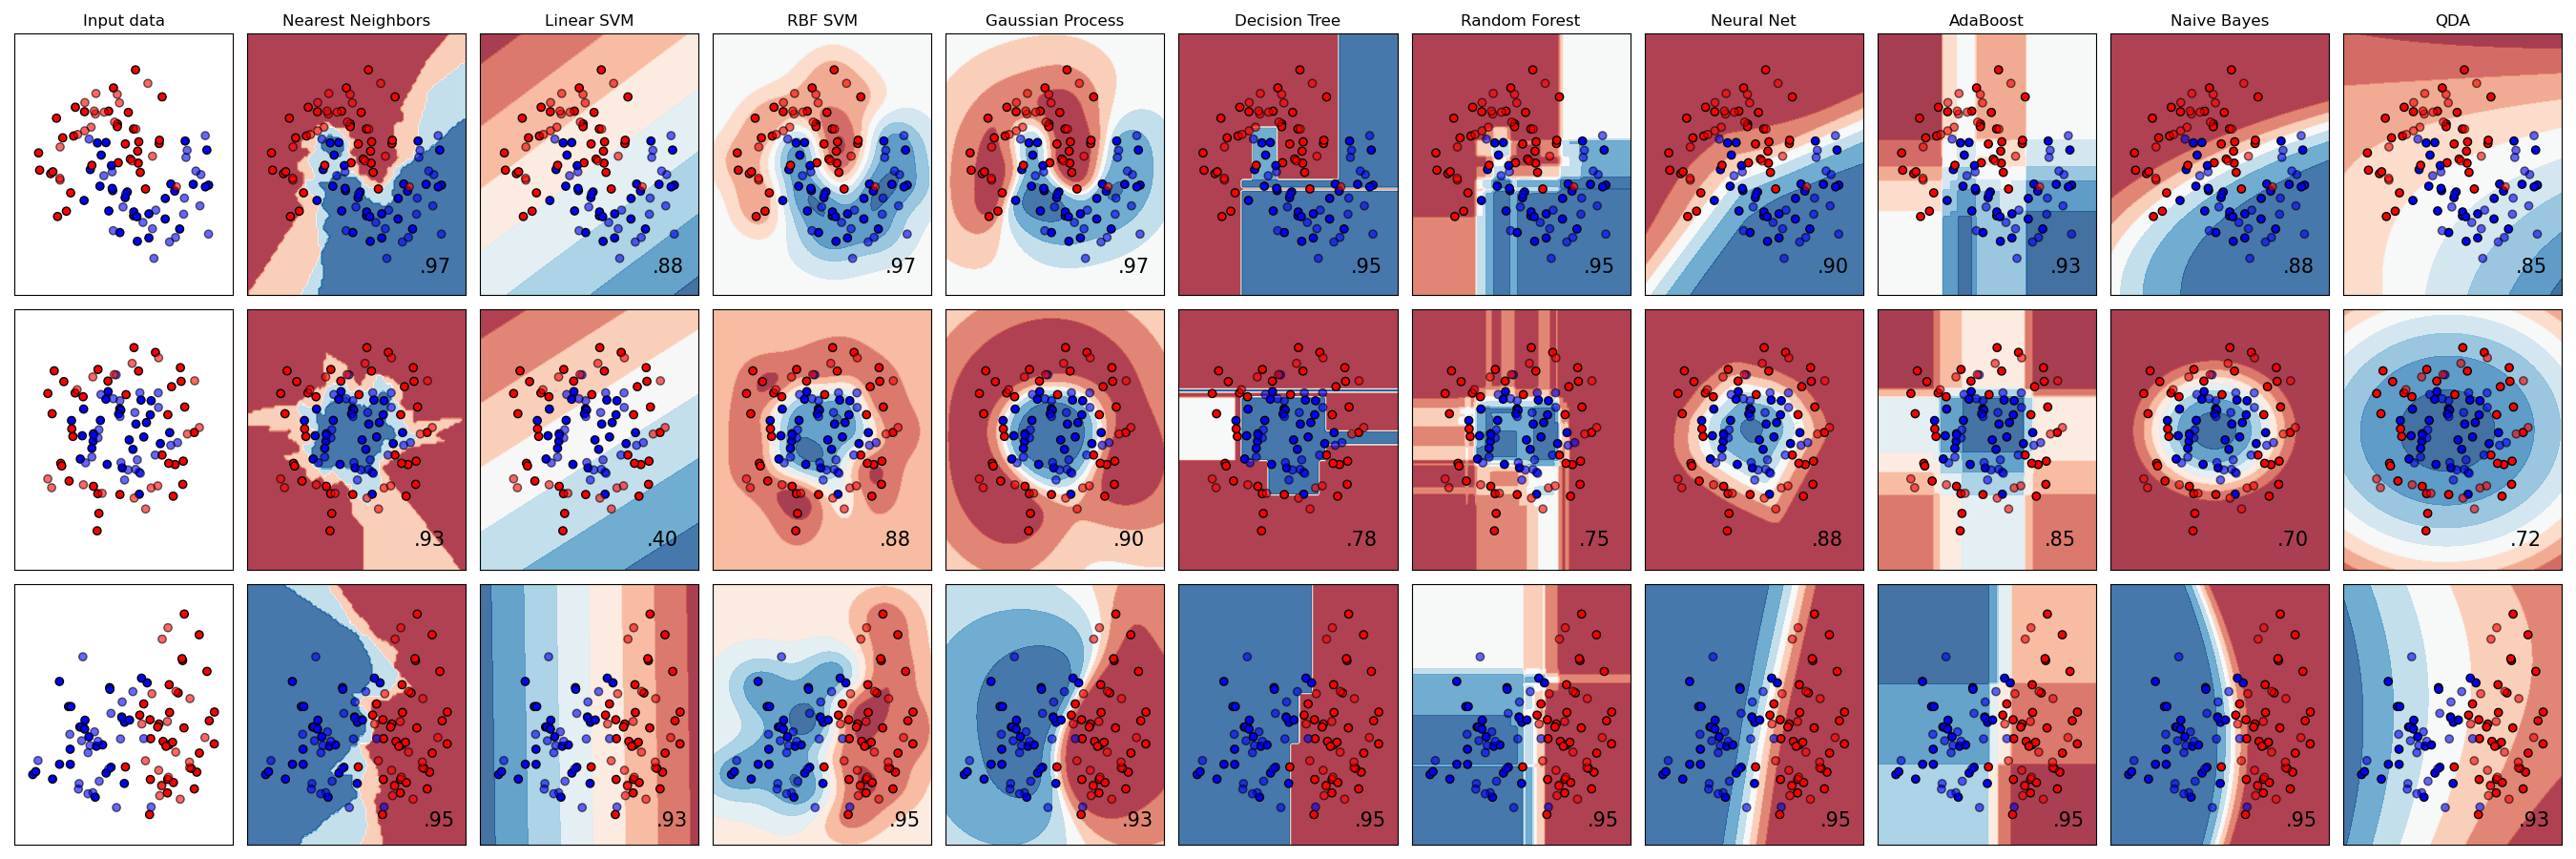

## Exercises: Random forest

As exercises, we will continue where we stopped with the previous series of exercises on decision trees.

11. Build a random forest model using the same dataset as in the exercises on decision trees.

12. Generate evaluation metrics for the random forest model. Which one performed better - the decision tree or the random forest model?

13. Rank the features in the random forest model in order of importance

# Homework

As homework, we recommend you to work through this tutorial on decision tree classification using COVID-19 data: https://github.com/NIGMS/Introduction-to-Data-Science-for-Biology  



# Resources for practice/used in making this tutorial

*   Research papers applying random forests and decision tree:
 * Paper deciding between treatment or surveillance for brain tumor (Gadot et al. 2022): https://thejns.org/focus/view/journals/neurosurg-focus/52/4/article-pE8.xml?tab_body=fulltext
 * Paper comparing decision trees, KNN means and other algorithms to predict if a gene is pathogenic or not (do Nascimento et al. 2020): https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7063785/


* Background:
  *   Introduction to random forests for biomedical data: https://www.editage.com/blog/random-forests-for-big-biomedical-data/
  *   Difference between a random-forest and a decision tree: https://www.geeksforgeeks.org/difference-between-random-forest-and-decision-tree/#


*   Examples and tutorials:
 *   Example/tutorial on classification with Decision trees 1: https://www.analyticsvidhya.com/blog/2023/01/step-by-step-working-of-decision-tree-algorithm/
 *   Example/tutorial on classification with Decision trees 2: https://www.w3schools.com/python/python_ml_decision_tree.asp
 *   Example/tutorial on classification using random forests: https://www.geeksforgeeks.org/random-forest-classifier-using-scikit-learn/
 * Tutorial on decision trees and random forests: https://www.science.smith.edu/~jcrouser/SDS293/labs/lab14-py.html

